In [8]:
import pandas as pd

# Load the dataset
file_path = '/Users/casperkristiansson/Downloads/billionaires.csv'
billionaires_df = pd.read_csv(file_path)

# Display the basic info and first few rows of the dataset
billionaires_df.info()
billionaires_df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2614 entries, 0 to 2613
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   name                      2614 non-null   object 
 1   rank                      2614 non-null   int64  
 2   year                      2614 non-null   int64  
 3   company.founded           2614 non-null   int64  
 4   company.name              2576 non-null   object 
 5   company.relationship      2568 non-null   object 
 6   company.sector            2591 non-null   object 
 7   company.type              2578 non-null   object 
 8   demographics.age          2614 non-null   int64  
 9   demographics.gender       2580 non-null   object 
 10  location.citizenship      2614 non-null   object 
 11  location.country code     2614 non-null   object 
 12  location.gdp              2614 non-null   float64
 13  location.region           2614 non-null   object 
 14  wealth.t

,name,rank,year,company.founded,company.name,company.relationship,company.sector,company.type,demographics.age,demographics.gender,...,location.gdp,location.region,wealth.type,wealth.worth in billions,wealth.how.category,wealth.how.from emerging,wealth.how.industry,wealth.how.inherited,wealth.how.was founder,wealth.how.was political
0,Bill Gates,1,1996,1975,Microsoft,founder,Software,new,40,male,...,8.100000e+12,North America,founder non-finance,18.5,New Sectors,True,Technology-Computer,not inherited,True,True
1,Bill Gates,1,2001,1975,Microsoft,founder,Software,new,45,male,...,1.060000e+13,North America,founder non-finance,58.7,New Sectors,True,Technology-Computer,not inherited,True,True
2,Bill Gates,1,2014,1975,Microsoft,founder,Software,new,58,male,...,0.000000e+00,North America,founder non-finance,76.0,New Sectors,True,Technology-Computer,not inherited,True,True
3,Warren Buffett,2,1996,1962,Berkshire Hathaway,founder,Finance,new,65,male,...,8.100000e+12,North America,founder non-finance,15.0,Traded Sectors,True,Consumer,not inherited,True,True
4,Warren Buffett,2,2001,1962,Berkshire Hathaway,founder,Finance,new,70,male,...,1.060000e+13,North America,founder non-finance,32.3,Traded Sectors,True,Consumer,not inherited,True,True


In [9]:
# Calculate the frequency of each unique value in the selected columns
sector_freq = billionaires_df['company.sector'].value_counts()
region_freq = billionaires_df['location.region'].value_counts()
industry_freq = billionaires_df['wealth.how.industry'].value_counts()

# Display the frequency distributions of the selected columns
sector_freq, region_freq, industry_freq


(real estate                                        177
 retail                                             120
 media                                              117
 construction                                        96
 banking                                             93
                                                   ... 
 internet service provider                            1
 consumer retail                                      1
 manufacturing (agriculture, steel, electronics)      1
 animal feed                                          1
 food sweeteners                                      1
 Name: company.sector, Length: 520, dtype: int64,
 North America               992
 Europe                      698
 East Asia                   535
 Latin America               182
 Middle East/North Africa    117
 South Asia                   69
 Sub-Saharan Africa           20
 0                             1
 Name: location.region, dtype: int64,
 Consumer                       

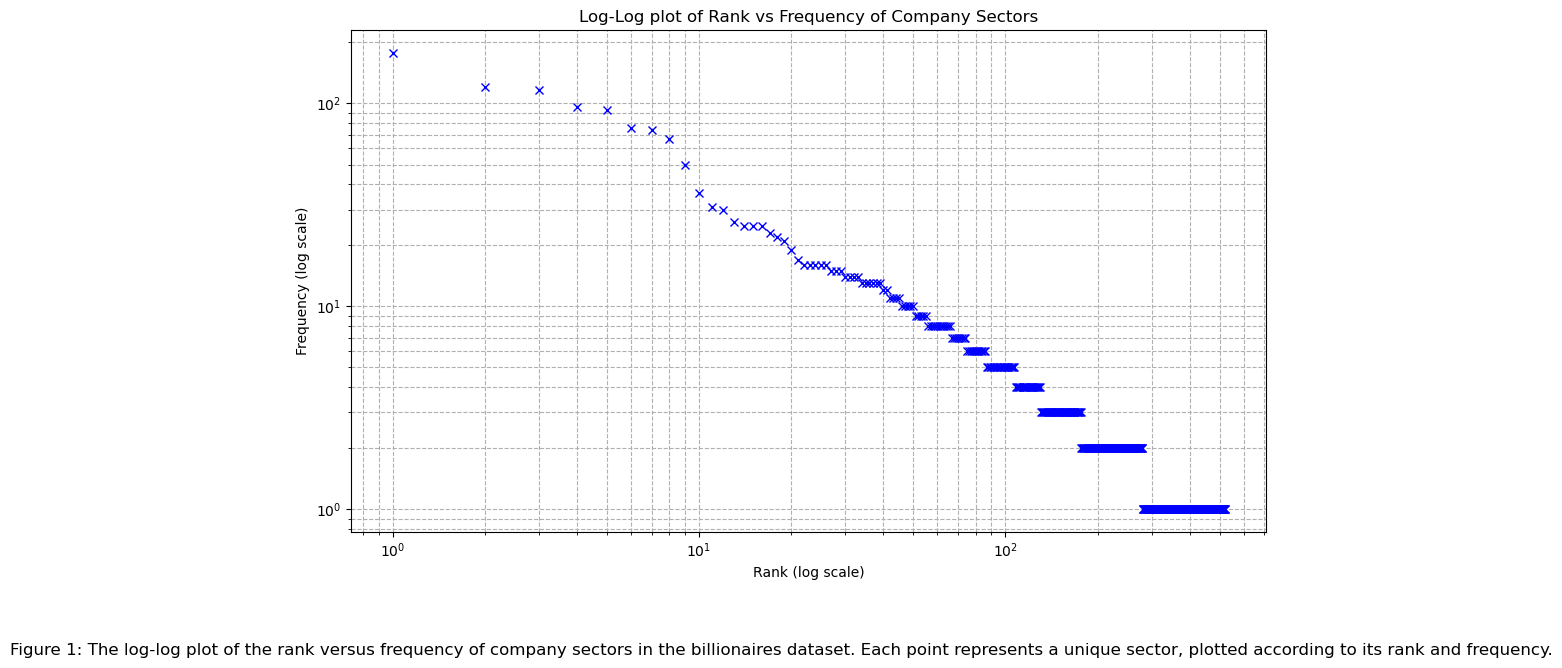

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Rank the sectors by their frequency
sector_freq_sorted = sector_freq.sort_values(ascending=False)
ranks = np.arange(1, len(sector_freq_sorted) + 1)

# Plot the rank vs frequency on a log-log scale
plt.figure(figsize=(10,6))
plt.loglog(ranks, sector_freq_sorted.values, marker='x', linestyle='None', color='b')
plt.title('Log-Log plot of Rank vs Frequency of Company Sectors')
plt.xlabel('Rank (log scale)')
plt.ylabel('Frequency (log scale)')
plt.grid(True, which="both", ls="--")

# Add figure caption
plt.figtext(0.5, -0.1, 
            "Figure 1: The log-log plot of the rank versus frequency of company sectors in the billionaires dataset. "
            "Each point represents a unique sector, plotted according to its rank and frequency.", 
            wrap=True, horizontalalignment='center', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


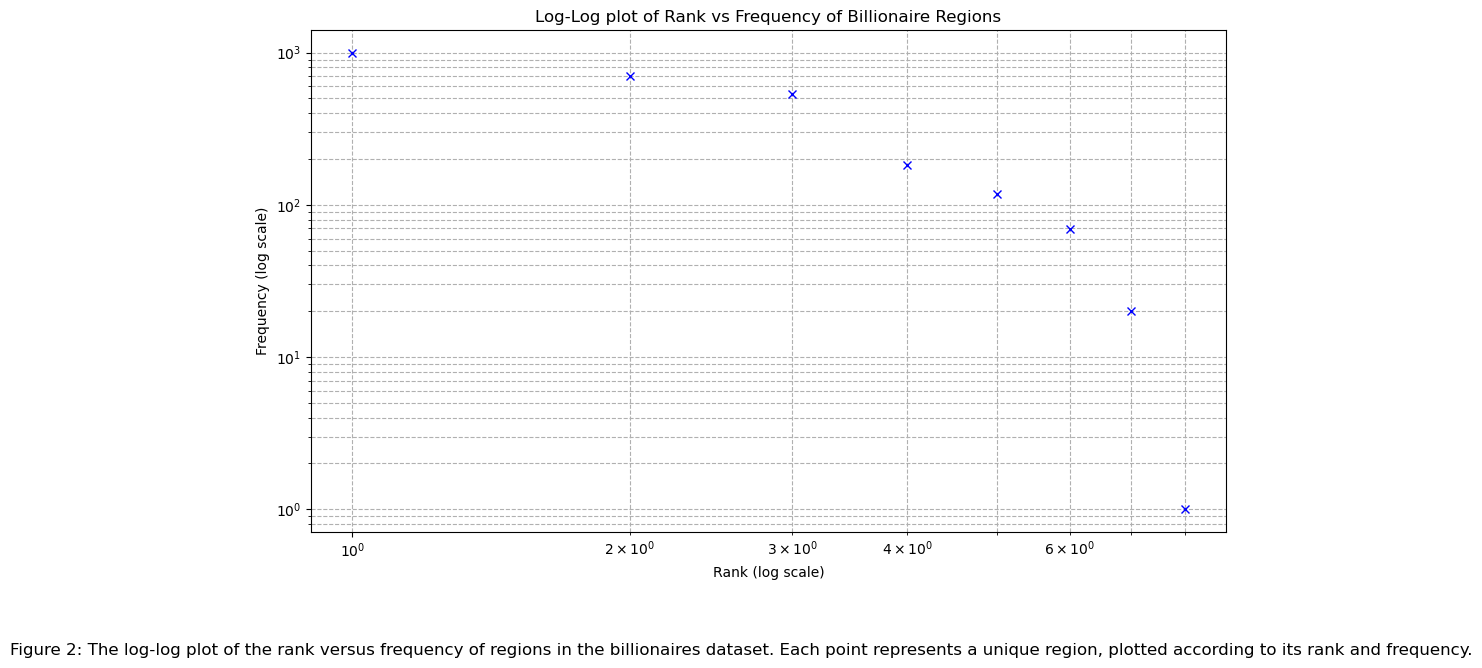

In [11]:
# Rank the regions by their frequency
region_freq_sorted = region_freq.sort_values(ascending=False)
region_ranks = np.arange(1, len(region_freq_sorted) + 1)

# Plot the rank vs frequency on a log-log scale for regions
plt.figure(figsize=(10,6))
plt.loglog(region_ranks, region_freq_sorted.values, marker='x', linestyle='None', color='b')
plt.title('Log-Log plot of Rank vs Frequency of Billionaire Regions')
plt.xlabel('Rank (log scale)')
plt.ylabel('Frequency (log scale)')
plt.grid(True, which="both", ls="--")

# Add figure caption
plt.figtext(0.5, -0.1, 
            "Figure 2: The log-log plot of the rank versus frequency of regions in the billionaires dataset. "
            "Each point represents a unique region, plotted according to its rank and frequency.", 
            wrap=True, horizontalalignment='center', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


In [12]:
region_freq_sorted

North America               992
Europe                      698
East Asia                   535
Latin America               182
Middle East/North Africa    117
South Asia                   69
Sub-Saharan Africa           20
0                             1
Name: location.region, dtype: int64

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Prepare the data
X = np.log(ranks).reshape(-1, 1)  # log(Rank)
y = np.log(sector_freq_sorted.values)  # log(Frequency)

# Create a linear regression model
model = LinearRegression()

# Fit the model to the data
model.fit(X, y)

# Predict the y values
y_pred = model.predict(X)

# Calculate the slope (m) and intercept (c) of the line
slope = model.coef_[0]  # This is -alpha
intercept = model.intercept_  # This is log(C)

# Calculate the mean squared error of the model
mse = mean_squared_error(y, y_pred)

# Display the slope, intercept, and mean squared error of the model
slope, intercept, mse

(-1.0047287220371364, 6.079179850951006, 0.028990230153060348)

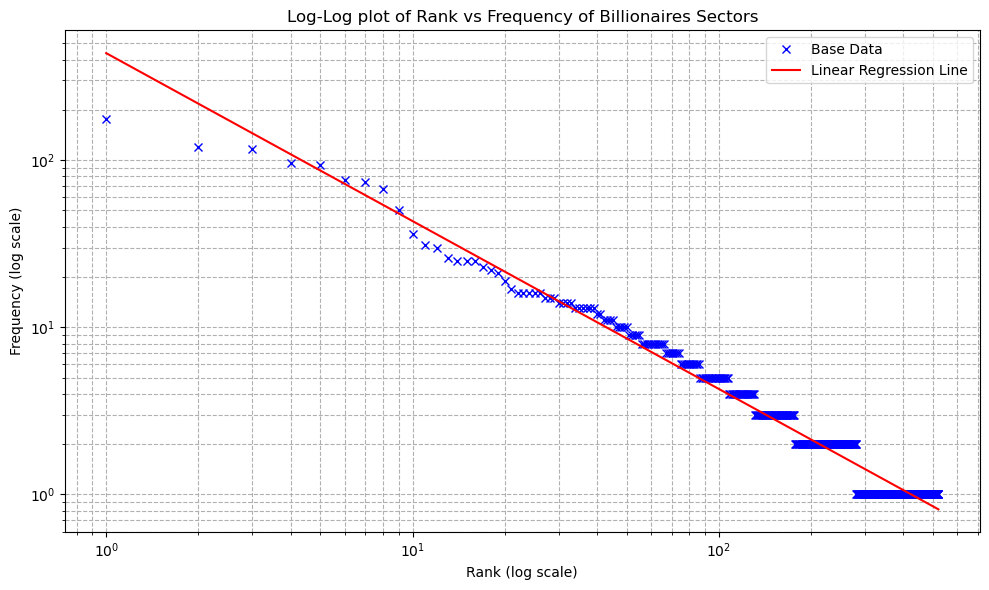

In [14]:
# Plot the original log-log plot along with the fitted line
plt.figure(figsize=(10,6))
plt.loglog(ranks, sector_freq_sorted.values, marker='x', linestyle='None', color='b', label='Base Data')
plt.loglog(ranks, np.exp(intercept) * ranks ** slope, linestyle='-', color='r', label=f'Linear Regression Line')

# Add labels, title, grid, and legend
plt.title('Log-Log plot of Rank vs Frequency of Billionaires Sectors')
plt.xlabel('Rank (log scale)')
plt.ylabel('Frequency (log scale)')
plt.grid(True, which="both", ls="--")
plt.legend()

# Add figure caption
# plt.figtext(0.5, -0.15, 
#             "Figure 2: The log-log plot of the rank versus frequency of company sectors in the billionaires dataset, "
#             "along with the fitted line representing the power-law relationship. The slope of the fitted line represents "
#             "the $\\alpha$ value and the intercept represents the $\\log(C)$ value.", 
#             wrap=True, horizontalalignment='center', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


In [15]:
ranks

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [16]:
sector_freq_sorted.values

array([177, 120, 117,  96,  93,  76,  74,  67,  50,  36,  31,  30,  26,
        25,  25,  25,  23,  22,  21,  19,  17,  16,  16,  16,  16,  16,
        15,  15,  15,  14,  14,  14,  14,  13,  13,  13,  13,  13,  13,
        12,  12,  11,  11,  11,  11,  10,  10,  10,  10,  10,   9,   9,
         9,   9,   9,   8,   8,   8,   8,   8,   8,   8,   8,   8,   8,
         8,   7,   7,   7,   7,   7,   7,   7,   7,   6,   6,   6,   6,
         6,   6,   6,   6,   6,   6,   6,   6,   5,   5,   5,   5,   5,
         5,   5,   5,   5,   5,   5,   5,   5,   5,   5,   5,   5,   5,
         5,   5,   5,   4,   4,   4,   4,   4,   4,   4,   4,   4,   4,
         4,   4,   4,   4,   4,   4,   4,   4,   4,   4,   4,   4,   4,
         3,   3,   3,   3,   3,   3,   3,   3,   3,   3,   3,   3,   3,
         3,   3,   3,   3,   3,   3,   3,   3,   3,   3,   3,   3,   3,
         3,   3,   3,   3,   3,   3,   3,   3,   3,   3,   3,   3,   3,
         3,   3,   3,   3,   3,   3,   3,   2,   2,   2,   2,   

In [18]:
# get the name of the lowest 100 sectors
lowest_sectors = sector_freq_sorted.tail(100).index
# get the amount of billionaires in the lowest 100 sectors
lowest_sectors_billionaires = sector_freq_sorted.tail(100).values

Index(['mettallurgy', 'copper, poultry', 'iron', 'laboratory services',
       'automotive', 'watch retail', 'polymers', 'pipes', 'laundry soap',
       'flavorings', 'printing', 'bank', 'food retail', 'medical equipment',
       'e-commerce, venture capital', 'food, entertainment',
       'internet domain and web hosting', 'oil services', 'ethanol',
       'bottled water', 'logistics', 'property, textile manufacturing',
       'hair care', 'gas pipeline', 'automotive components',
       'hotels and supermarkets', 'food manufacturing', 'healthcare IT',
       'sports team', 'trade fairs', 'shipbuilding', 'processing machinary',
       'lumber', 'solar energy', 'timber, plantations', 'trucking ',
       'oleochemicals and palm oil', 'animation', 'payroll processing ',
       'meat processing', 'mining, investments', 'tractors',
       'domestic appliances', 'antennas', 'mass transit', 'snack foods',
       'home furnishings', 'trucking and logistics', 'auto components',
       'cameras'